## 0. 목차

1. k-최근접 이웃 분류기로 확률 예측하기
2. 로지스틱 회귀로 이진 분류 수행하기
3. 로지스틱 회귀로 다중 분류 수행하기
4. 소프트맥스 함수로 다중 분류 확률 계산하기
4. 확률적 경사 하강법

**데이터 준비**

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#iris 데이터 준비하기
iris = datasets.load_iris()

#판다스 데이터프레임으로 변환
Iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#head()를 이용해 데이터 일부 확인하기
""" Your code """
Iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1. k-최근접 이웃 분류기로 확률 예측하기

In [3]:
#iris 타겟값 지정
Iris['target'] = iris.target

#unique() - iris 고유값 추출
print(pd.unique(Iris['target']))

[0 1 2]


In [4]:
#0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
Iris['target'] = Iris['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
print(pd.unique(Iris['target']))

['setosa' 'versicolor' 'virginica']


In [8]:
#타깃 데이터와 훈련 데이터 만들기
iris_input = Iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
iris_target = Iris['target'].to_numpy()

#훈련 데이터와 타깃 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, random_state = 42)

#표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
#클래스 임포트
from sklearn.neighbors import KNeighborsClassifier

#이웃 개수가 3개인 객체 생성
kn = KNeighborsClassifier(n_neighbors=3)

#훈련 데이터 학습
kn.fit(train_scaled, train_target)

#훈련 점수 출력
print(kn.score(train_scaled, train_target))
#테스트 점수 출력
print(kn.score(test_scaled, test_target))

0.9464285714285714
1.0


In [12]:
#classes_ 속성에 저장된 타깃값 출력
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [13]:
#처음 5개 샘플의 타깃값 예측
print(kn.predict(train_scaled[:5]))

['setosa' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [15]:
# predict_proba() 메서드를 사용하여 클래스별 확률값을 반환합니다.
proba = kn.predict_proba(test_scaled[:5])
print(proba)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


## 2.로지스틱 회귀로 이진 분류 수행하기

**(1) 로지스틱 함수(시그모이드 함수) 그리기**

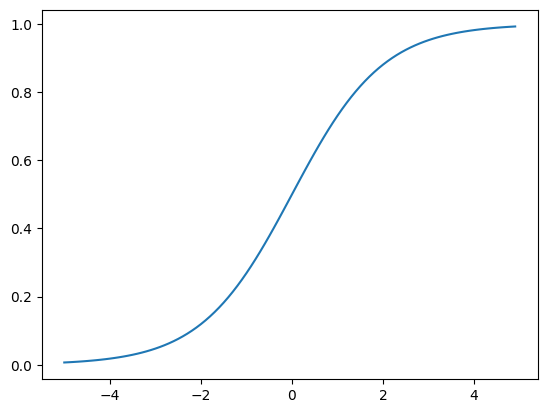

In [16]:
#-5와 5 ㅡ사이에 0.1 간격으로 z 배열 만들기
z = np.arange(-5, 5, 0.1)

#exp() - 지수 함수 계산
phi = 1 / (1 + np.exp(-z))

#파이 = y축 / z = x축
plt.plot(z, phi)
plt.show()

**(2) 불리언 언덱싱** : 이진 분류 데이터 만들기

In [17]:
'''
불리언 언덱싱을 사용하여 'setosa' 'virginica' 클래스만 추출합니다.

[ 불리언 언덱싱 ]
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])
# 출력값 : ['A' 'C']
'''
#연산자 OR(|) 이용해 비교식 만들기
setosa_virginica_indexes = (train_target == 'setosa') | (train_target == 'virginica')

#훈련 세트 생성
train_setosa_virginica = train_scaled[setosa_virginica_indexes]
#타겟 세트 생성
target_setosa_virginica = train_target[setosa_virginica_indexes]

In [21]:
# 사이킷런의 선형모델 LogisticRegression 임포트
from sklearn.linear_model import LogisticRegression

#객체 생성
lr = LogisticRegression()
#모델 훈련
lr.fit(train_setosa_virginica, target_setosa_virginica)

#5개의 샘플(행) 출력
print(lr.predict_proba(train_setosa_virginica[:5]))

[[0.98893001 0.01106999]
 [0.99436886 0.00563114]
 [0.02427132 0.97572868]
 [0.98620647 0.01379353]
 [0.98473316 0.01526684]]


In [23]:
# classes_ 속성으로 이진 분류 클래스 확인하기
print(lr.classes_)

#로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

['setosa' 'virginica']
[[ 0.8228674  -0.67792496  1.34488939  1.35627503]] [0.93908071]


앞서 구한 5개의 샘플의 확률이 각각 **첫 번째 열 : setosa / 두 번째 열 : virginica**에 대한 확률을 알 수 있습니다.

In [24]:
# LogisticRegression 모델로 z값 계산하기
'''
decision_function() 메서드 사용하여 z값을 계산합니다.
'''
decisions = lr.decision_function(train_setosa_virginica[:5])
print(decisions)

[-4.49238573 -5.17379545  3.69388916 -4.26966585 -4.16668744]


In [25]:
'''
expit() 메서드를 사용하여 도출된 z값을 시그모이드 함수에 통과시킵니다.
'''
from scipy.special import expit
print(expit(decisions))

[0.01106999 0.00563114 0.97572868 0.01379353 0.01526684]


## 3.로지스틱 회귀로 다중 분류 수행하기

In [26]:
#max_iter = 1000(for 충분한 훈련) / C = 20 설정
lr = LogisticRegression(C=20, max_iter = 1000)
#모델 학습
'''
타겟을 2개로 분리하기 이전의 iris 데이터입니다.
'''
lr.fit(train_scaled, train_target)

#훈련 세트와 테스트 세트의 점수 출력하기
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
1.0


In [27]:
#테스트 세트의 처음 5개의 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #소수점 네 번재 자리 반올림

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]


In [29]:
# 클래스 정보 확인
print(lr.classes_)

#확률 출력
print(np.round(proba, decimals = 3))

['setosa' 'versicolor' 'virginica']
[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]


## 4. 소프트맥스 함수로 다중 분류 확률 계산하기

다중 분류는 소프트맥스 함수를 사용하여 여러 개의 선형 방정식을 0~1 사이로 압축하고, 전체 합이 1이 되도록 만듭니다.

In [30]:
#테스트 세트의 처음 5개의 샘플에 대한 z1~z7 값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -3.83   4.21  -0.38]
 [ 13.07   7.84 -20.92]
 [-18.64   2.58  16.06]
 [ -4.19   3.63   0.56]
 [ -6.52   4.84   1.68]]


In [31]:
from scipy.special import softmax
#decison 배열 softmax() 함수에 전달
proba = softmax(decision, axis = 1)
'''
axis : 소프트맥스의 계산 축
axis = 1 : 각 샘플에 대해 소프트맥스 계산
cf) axis 지정 X : 배열 전체에 대해 소프트맥스 계산.
'''
print(np.round(proba, decimals = 3))

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]


## 5. 확률적 경사 하강법

In [32]:
# 당뇨 데이터 csv 불러오기
Diabete = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes.csv')

# head()를 통해 자료 확인해보기
Diabete.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# 원하는 열을 골라 넘파이 리스트로 변환하기
diabete_input = Diabete[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']].to_numpy()
diabete_target = Diabete['diabetes'].to_numpy()

In [34]:
# 훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(
    diabete_input, diabete_target, random_state=42)

In [35]:
# 정규화 작업
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [36]:
# SGDClassifier 활용

# 효과적으로 이진분류를 하기 위해 손실함수를 로그함수로 지정
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [37]:
# 훈련 세트와 테스트 세트 평가 결과 출력하기
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7083333333333334
0.671875




> 에포크 과대/과소적합



In [38]:
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [39]:
for _ in range (0, 200) :
  sc.partial_fit(train_scaled, train_target, classes=classes)

  # 위에서 만든 스코어 배열에 각각 점수 추가하기
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


partial_fit 메서드는 데이터의 일부로 훈련하기 때문에 전달된 타깃 배열에 전체 클래스가 모두 포함되어 있다하기 힘듦.

따라서, 'classes = classes' 매개변수를 통해 클래스 정보를 별도로 전달해 줌

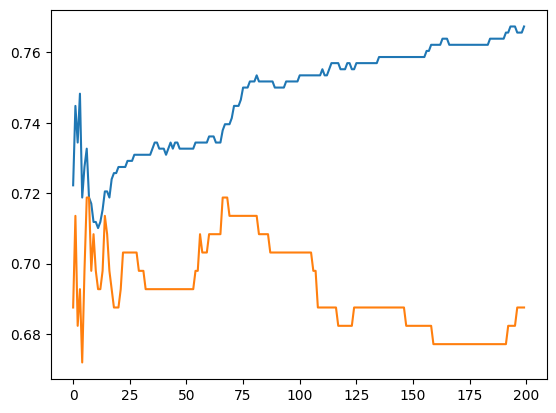

In [40]:
# 위에서 추가한 두 배열을 그래프로 시각화하기
plt.plot(train_score)
plt.plot(test_score)

plt.show()

In [43]:
# 위 그래프에서 적절한 에포크 지수는 60이라고 판단
# 그래프를 통해 찾은 적절한 에포크 지수로 다시 학습시키기
sc = SGDClassifier(loss = 'log', max_iter=60, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=60, random_state=42, tol=None)

In [44]:
# 훈련 세트와 테스트 세트 평가 결과 출력하기
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7482638888888888
0.7291666666666666
